## Research questions
### Hoofdvraag
To what extent is hunger in sub-Saharan Africa related to environmental hazards and how will this trend develop until 2030 under the effects of climate change?
#### subquestions
How did the indicators regarding zero hunger developed in the last decades (for sub-Saharan Africa)?

 *Use WDI data set, for indicators of zero hunger see http://datatopics.worldbank.org/sdgs/ *
 
 *Output graphs: some general graphs that descrice the state of hunger in sub saharan africa like nicely done here: * http://www.fao.org/state-of-food-security-nutrition/en/\n",
 
- What has been the historic trend of environmental hazards in sub-Saharan Africa and what was the impact on the food systems?

*Use data of EM-DAT Environmental data base and OECD Agriculture statistics, maybe focus on sub regions in Africa Output graphs could be like*

http://www.fao.org/3/i8656en/I8656EN.pdf

- How will the trend of environmental hazards look like in the future? What will be the occurences until 2030?

*Use data of EM-DAT and extrapolate for the various hazards for example Storms, Floods, Drought, Tsunamis*

- How will the change in environmental hazards affect the food production output? (make some kind of and regresion model)

*Use data of OECD Food production*

- Which policies could counteract these negative effects on food production?

find some policies in papers, estimate those effects and put into a graph

## INFORMATIE BRONNEN

- statistiek over voedsel output http://www.fao.org/state-of-food-security-nutrition/en/\n",
- Report over voedsel en impact van weergerelateerde rampen http://www.fao.org/documents/card/en/c/I8656EN/\n",
- http://www.fao.org/state-of-food-security-nutrition/en/\n",
- FAO - Climate change predictions in sub-Saharan Africa: impacts and adaptations http://www.fao.org/3/a-i7040e.pdf\n",
- Database rampen: https://www.cred.be/projects/EM-DAT\n",
 
## Opbouw report
#### Hoofdstuk 1: introductie en eerste graphs
- Inleiding no hunger goal 2030 van UN
        - Introductie onderzoeksvragen
          - uitleggen methodologie
- Hoofdstuk 2: Data preperation
        - Wat voor data is gebruikt?
        - Hoe is die gecleaned/bewerkt om te gebruiken
- Hoofdstuk 3: uitwerken onderzoeksvragen
        - Uitwerken onderzoeksvraag aan de hand van analyseren data & graphs
        - Schatten van toekomst met regressie analyse / trend analyses. 
        - Aan de hand van deze gegevens een schatting maken voor al deze veriabelen, maar vooral het effect op de ondervoeding/voedseltekort 
        - Policy aanbeveling doen
- Hoofdstuk 4: aanbevelingen/conclusie\n",

### PythonProjectQuarter1 - opdracht vak
Assignment Create a Jupyter Notebook that contains your explanations and analyses. Start the notebook with a clear description of your research question and the type of analysis you are going to perform. The conceptual contents of the Notebook should be roughly similar to a normal written report of 10-20 pages. Make your Notebook self-explanatory. So, it should contain text (with references) as well as your actual analysis code and results. If you want to use other libraries for your analyses or visualizations, feel free to do so. However, only use free available and well-known libraries. The ones that come standard with Anaconda are fine. If you want to use something else, that you first need to install, check with us first. Create a zip archive and upload it on Brightspace. Some (minimum) properties of the Notebook and your analyses on which we will grade

Demonstrate your skills in Python by using typical Python constructs and using the appropriate data structures (lists, 
dictionaries, tuples, arrays, dataframes, series, recursion, etc.

Try to think of reusability of your code. How easy would it be to use your same code if we want to try to do a small variations of your analysis? Can we easily adapt/play around with your code?
How difficult were your analyses?

## Indicators
- Prevalence of undernourishment (% of population) SN.ITK.DEFC.ZS
- Prevalence of stunting, height for age (% of children under 5) - SH.STA.STNT.ZS
- Prevalence of stunting, height for age, female (% of children under 5) - SH.STA.STNT.FE.ZS
- Prevalence of stunting, height for age, male (% of children under 5) - SH.STA.STNT.MA.ZS
- AG.YLD.CREL.KG  Cereal yield (kg per hectare
- SH.SVR.WAST.ZS  prevalence of severy wasting % of children
- SH.SVR.WAST.FE.ZS prevalence of severy wasting % of female
- SH.SVR.WAST.MA.ZS prevalence of severy wasting % of man
- SH.STA.WAST.ZS prevalence of wasting % of children
- SH.STA.WAST.FE.ZS prevalence of wasting % of female
- SH.STA.WAST.MA.ZS prevalence of wasting % of man
- Exclusive breastfeeding (% of children under 6 months) SH.STA.BFED.ZS
- Prevalence of anemia among children (% of children under 5) SH.ANM.CHLD.ZS 
- Prevalence of anemia among non-pregnant women (% of women ages 15-49) SH.ANM.NPRG.ZS
- Prevalence of anemia among pregnant women (%) SH.PRG.ANEM
- Prevalence of anemia among women of reproductive age (% of women ages 15-49) SH.ANM.ALLW.ZS
- Prevalence of overweight, weight for height (% of children under 5) SH.STA.OWGH.ZS
- Prevalence of overweight, weight for height, female (% of children under 5) SH.STA.OWGH.FE.ZS
- Prevalence of overweight, weight for height, male (% of children under 5) SH.STA.OWGH.MA.ZS"


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
plt.style.use('ggplot')
import plotly.plotly as py

#C:\full\path\to\right\python.exe m pip install plotly

In [ ]:
#Zet dit eerst goed voordat je begint te werken!











os.chdir("C:\\Users\\Rob\\Documents\\GitHub\\data")
os.getcwd()

In [18]:
#downlaod dfc from: https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv\n",
dfc = pd.read_csv("countriescodes.txt", sep = ",", encoding = 'latin-1')
l = dfc[dfc['sub-region'] == "Sub-Saharan Africa"]["alpha-3"]
region = pd.Series(["SSF","WLD"]) #voeg wereld en Sub-Saharan Africa toe
l = l.append(region)
WDI = pd.read_csv("WDI/WDIData.csv")
WDI_SSA = WDI[WDI["Country Code"].isin(l)]

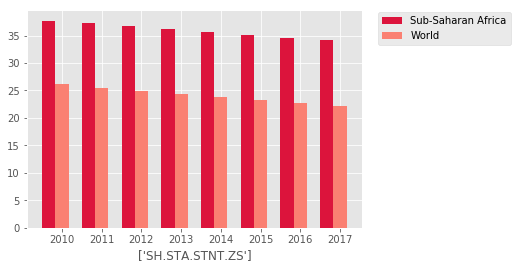

In [30]:
#bar charts for hunger indicators
stunting = "SH.STA.STNT.ZS"
wasting = "SH.STA.WAST.ZS"
overweight = "SH.STA.OWGH.ZS"
anemia = "SH.ANM.ALLW.ZS"

li = [stunting] 
WDI_SSA_I = WDI_SSA[WDI_SSA["Indicator Code"].isin(li) ]
#get all the necessary columns
SSA_00_17 = pd.concat([WDI_SSA_I.loc[:,'Country Name':'Indicator Code'],WDI_SSA_I.loc[:,'2010':'2017']], axis=1)
#melt the data into a long format
melted = pd.melt(SSA_00_17, id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="Year", value_name="Value")
#plot indicator over time for one country
ll = [ 'Sub-Saharan Africa','World']
mc = melted.loc[melted['Country Name'].isin(ll)] 
mc = mc.sort_values(["Country Name", "Year"])
x = mc[mc["Country Name"] == 'World']["Year"]
y1 = mc[mc["Country Name"] == 'World']["Value"]
y2 = mc[mc["Country Name"] == 'Sub-Saharan Africa']["Value"]
indices = range(2010, 2018)
width = np.min(np.diff(indices))/3
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices-width,y2,width,color='#DC143C',label='Sub-Saharan Africa')
ax.bar(indices,y1,width,color='#FA8072',label='World')
ax.set_xlabel(li)
plt.legend(loc=((1.05,0.84)))
plt.show()

In [ ]:
df_sdg = pd.read_csv("SDG//SDGData.csv")
df_wdi = pd.read_csv("WDI//WDIData.csv")
all_indicators = df_sdg["Indicator Name"].unique()
all_codes = df_sdg["Indicator Code"].unique()
type(all_codes)

In [5]:
import plotly as py
import plotly.plotly as pltly

# Create random data with numpy
import numpy as np

N = 500
random_x = np.linspace(0, 1, N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y
)

data = [trace]

pltly.iplot(data, filename='basic-line')


ModuleNotFoundError: No module named '_plotly_utils'

In [8]:
import plotly
plotly.tools.set_credentials_file(username='itjallingii', api_key='VyPpBEtq9qRiGgSYkPzO')

ModuleNotFoundError: No module named '_plotly_utils'

In [5]:
import plotly.plotly as py
import plotly.graph_objs as go

ModuleNotFoundError: No module named '_plotly_utils'